In [ ]:
""" 
Planning a celebration is a balancing act of preparing just 
enough food to go around without being stuck eating the same leftovers 
for the next week. The key is anticipating how many guests will come. Grupo Bimbo must 
weigh similar considerations as it strives to meet daily consumer demand for fresh bakery products 
on the shelves of over 1 million stores along its 45,000 routes across Mexico.

Currently, daily inventory calculations are performed by direct delivery sales 
employees who must single-handedly predict the forces of supply, demand, and hunger based on 
their personal experiences with each store. With some breads carrying a one week shelf life, 
the acceptable margin for error is small.

In this competition, Grupo Bimbo invites Kagglers to develop a model to accurately 
forecast inventory demand based on historical sales data. Doing so will make sure consumers 
of its over 100 bakery products aren’t staring at empty shelves, while also reducing the 
amount spent on refunds to store owners with surplus product unfit for sale.

Things to note:

* There may be products in the test set that don't exist in the train set. 
        This is the expected behavior of inventory data, since there are new products being sold all the time. 
        Your model should be able to accommodate this.

* There are duplicate Cliente_ID's in cliente_tabla, which means one Cliente_ID 
        may have multiple NombreCliente that are very similar. This is due to the NombreCliente 
        being noisy and not standardized in the raw data, so it is up to you to decide how to clean up 
        and use this information. 
        
* The adjusted demand (Demanda_uni_equil) is always >= 0 since demand should be 
        either 0 or a positive value. The reason that Venta_uni_hoy - Dev_uni_proxima sometimes 
        has negative values is that the returns records sometimes carry over a few weeks.

Data fields

* Semana — Week number (From Thursday to Wednesday)
* Agencia_ID — Sales Depot ID
* Canal_ID — Sales Channel ID
* Ruta_SAK — Route ID (Several routes = Sales Depot)
* Cliente_ID — Client ID
* NombreCliente — Client name
* Producto_ID — Product ID
* NombreProducto — Product Name
* Venta_uni_hoy — Sales unit this week (integer)
* Venta_hoy — Sales this week (unit: pesos)
* Dev_uni_proxima — Returns unit next week (integer)
* Dev_proxima — Returns next week (unit: pesos)
* Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)

"""

In [ ]:
# Count the elements with the label 'SIN NOMBRE' & 'NO IDENTIFICADO'
#df_TrainSpk0.filter(df_TrainSpk0.NombreCliente.isin(['SIN NOMBRE', 'NO IDENTIFICADO'])).count()

# Erase all the elements with the label 'SIN NOMBRE' & 'NO IDENTIFICADO'
#df_ClientSpk = df_ClientSpk.filter(df_ClientSpk.NombreCliente != 'SIN NOMBRE')
#df_ClientSpk = df_ClientSpk.filter(df_ClientSpk.NombreCliente != 'NO IDENTIFICADO')
#df_TrainSpk01 = df_TrainSpk.groupby(['Semana', 'Producto_ID']).agg({"Venta_hoy"}).collect()
#df_TrainSpk01 = df_TrainSpk.describe()

# Sales/devolution dataframe
#df_SD = df_TrainSpk.select(["Semana", "Dev_uni_proxima", "Venta_uni_hoy"])

#df_AvgDevProductWeek = df_DevProductWeek.groupby(["Semana"]).agg({"Dev_uni_proxima":"avg"}).collect()
#df_DevProductWeek = df_DevProductWeek.groupby(["Semana"]).agg({"Dev_uni_proxima":"sum"}).collect()
#df_ProductsWeek = df_ProductsWeek.groupby(["Semana"]).count().collect()

#df_DevWeek = df_SD.groupby(["Semana"]).agg({"Dev_uni_proxima":"sum"}).collect()
#df_SalWeek = df_SD.groupby(["Semana"]).agg({"Venta_uni_hoy": "sum"}).collect()

#df_PercDevolutions = df_TopAgencies.rdd.map(lambda x: (float(x.Devolucion_unidades)/(x.Devolucion_unidades + x.Venta_unidades)) * 100).collect()

#df_ASG00 = df_TrainSpk02.groupby(["Semana","Agencia_ID"]).agg({"Venta_uni_hoy": "sum"}).collect()
#df_ASG01 = df_AS.groupby(["Agencia_ID"]).agg({"Venta_uni_hoy": "sum"}).collect()

#pd999 = pd_TopAgencies.assign(Perc_Devolutions = lambda x: x.Devolucion_unidades/(x.Devolucion_unidades + x.Venta_unidades) * 100)

#pd_TrainSpk01.plot(x = 'Semana', y = 'Total Devolutions(units)', kind = 'bar', figsize = [15, 5], title = 'Dev Products by Week')
#pd_TrainSpk01.plot(x = 'Semana', y = 'Total Sales(units)', kind = 'bar', figsize = [15, 5], title = 'Total Products by Week')
#pd_TrainSpk01.plot(x = 'Semana', y = 'Total Sales(pesos)', kind = 'bar', figsize = [20, 5], title = 'Total Sales by Week')

#df_ASG01 = spark.createDataFrame(df_ASG01)
#df_ADG01 = df_ASG01.selectExpr("Agencia_ID as Agencia")

In [65]:
# The code was removed by DSX for sharing.

In [66]:
# Print the schema for each data frame

print("\nClient Schema:")
df_ClientSpk.printSchema()

print("\nProduct Schema:")
df_ProductSpk.printSchema()

print("\nTown Schema:")
df_TownSpk.printSchema()

print("\nTest Schema:")
df_TestSpk.printSchema()

print("\nTrain Schema:")
df_TrainSpk.printSchema()


Client Schema:
root
 |-- Cliente_ID: integer (nullable = true)
 |-- NombreCliente: string (nullable = true)


Product Schema:
root
 |-- Producto_ID: string (nullable = true)
 |-- NombreProducto: string (nullable = true)


Town Schema:
root
 |-- Agencia_ID: string (nullable = true)
 |-- Town: string (nullable = true)
 |-- State: string (nullable = true)


Test Schema:
root
 |-- id: string (nullable = true)
 |-- Semana: string (nullable = true)
 |-- Agencia_ID: string (nullable = true)
 |-- Canal_ID: string (nullable = true)
 |-- Ruta_SAK: string (nullable = true)
 |-- Cliente_ID: string (nullable = true)
 |-- Producto_ID: string (nullable = true)


Train Schema:
root
 |-- Semana: integer (nullable = true)
 |-- Agencia_ID: integer (nullable = true)
 |-- Canal_ID: integer (nullable = true)
 |-- Ruta_SAK: integer (nullable = true)
 |-- Cliente_ID: integer (nullable = true)
 |-- Producto_ID: integer (nullable = true)
 |-- Venta_uni_hoy: integer (nullable = true)
 |-- Venta_hoy: double (nul

In [67]:
# Set the conditions for the union 
CondClient = [df_TrainSpk.Cliente_ID == df_ClientSpk.Cliente_ID]
CondProduct = [df_TrainSpk.Producto_ID == df_ProductSpk.Producto_ID]
CondLocation = [df_TrainSpk.Agencia_ID == df_TownSpk.Agencia_ID]

# Do the join with the above conditions

df_TrainSpk0 = df_TrainSpk.join(df_ClientSpk, CondClient).drop(df_ClientSpk.Cliente_ID)
df_TrainSpk0 = df_TrainSpk0.join(df_ProductSpk, CondProduct).drop(df_ProductSpk.Producto_ID)
df_TrainSpk0 = df_TrainSpk0.join(df_TownSpk, CondLocation).drop(df_TownSpk.Agencia_ID)

In [68]:
# Show the result from the above union

df_TrainSpk0.take(1)

[Row(Semana=9, Agencia_ID=2012, Canal_ID=1, Ruta_SAK=2802, Cliente_ID=2122, Producto_ID=31580, Venta_uni_hoy=1, Venta_hoy=11.53, Dev_uni_proxima=0, Dev_proxima=0.0, Demanda_uni_equil=1, NombreCliente=u'CONASUPO', NombreProducto=u'Suavicremas Chocolate 237g MTA MLA 31580', Town=u'2176 TOLUCA SAN ANTONIO', State=u'ESTADO DE M\xc9XICO')]

In [69]:
# Group the df by semana at the final we'll have the total prodocut sold by week and the total devolutions by week

df_TrainSpk01 = df_TrainSpk0.select(["Semana", "Dev_uni_proxima","Dev_proxima", "Venta_uni_hoy", "Venta_hoy"])
df_TrainSpk01 = df_TrainSpk01.groupby(["Semana"]).agg({"Dev_uni_proxima":"sum", "Dev_proxima" : "sum", "Venta_uni_hoy": "sum", "Venta_hoy": "sum"}).collect()

In [70]:
# In order to make a good visualization, we going to convert the Spark df to a Pandas df

pd_TrainSpk01 = pd.DataFrame(df_TrainSpk01)
print(pd_TrainSpk01)

   0                1         2             3        4
0  6  12962084.879996  75648819  7.108970e+08  1329180
1  3  12865432.599996  79483902  7.585865e+08  1293077
2  5  12405686.019997  79401542  7.377157e+08  1227366
3  9  13323608.589996  76926693  7.257566e+08  1648442
4  4  13452788.009997  81494467  7.657165e+08  1330468
5  8  13966464.739996  77431217  7.230621e+08  1459857
6  7  13785374.809996  78503357  7.316086e+08  1427096


In [71]:
pd_TrainSpk01.columns = ['Semana', 'Devoluciones(pesos)', 'Venta(unidades)', 'Ventas(pesos)', 'Devolucion(unidades)']

In [72]:
print("**********************************************")
print(pd_TrainSpk01)

**********************************************
   Semana  Devoluciones(pesos)  Venta(unidades)  Ventas(pesos)  \
0       6      12962084.879996         75648819   7.108970e+08   
1       3      12865432.599996         79483902   7.585865e+08   
2       5      12405686.019997         79401542   7.377157e+08   
3       9      13323608.589996         76926693   7.257566e+08   
4       4      13452788.009997         81494467   7.657165e+08   
5       8      13966464.739996         77431217   7.230621e+08   
6       7      13785374.809996         78503357   7.316086e+08   

   Devolucion(unidades)  
0               1329180  
1               1293077  
2               1227366  
3               1648442  
4               1330468  
5               1459857  
6               1427096  


In [73]:
pd_TrainSpk01 = pd_TrainSpk01.sort_values(by = ['Semana'], ascending = True)
print(pd_TrainSpk01)

   Semana  Devoluciones(pesos)  Venta(unidades)  Ventas(pesos)  \
1       3      12865432.599996         79483902   7.585865e+08   
4       4      13452788.009997         81494467   7.657165e+08   
2       5      12405686.019997         79401542   7.377157e+08   
0       6      12962084.879996         75648819   7.108970e+08   
6       7      13785374.809996         78503357   7.316086e+08   
5       8      13966464.739996         77431217   7.230621e+08   
3       9      13323608.589996         76926693   7.257566e+08   

   Devolucion(unidades)  
1               1293077  
4               1330468  
2               1227366  
0               1329180  
6               1427096  
5               1459857  
3               1648442  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4addb78d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa424bef550>], dtype=object)

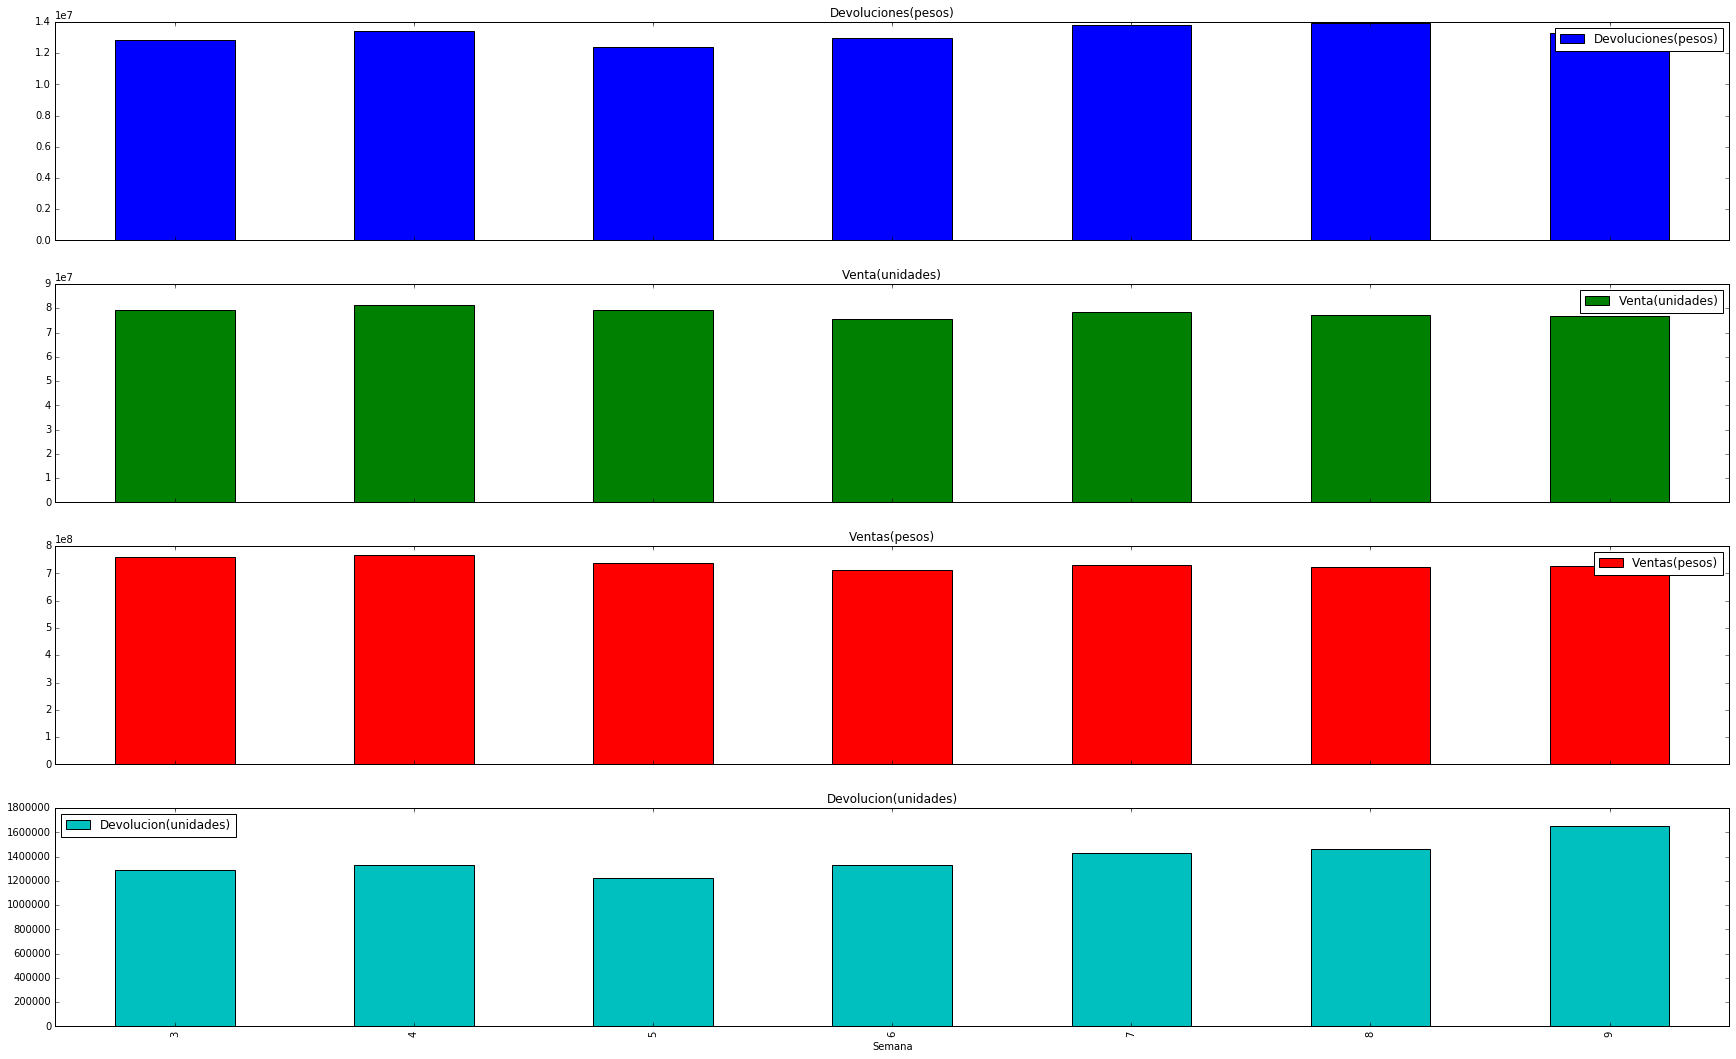

In [74]:
# ****************************************************************************************************
# The next is the summary sales(units, pesos) and devolutions(units, pesos & % of devolution) by week

pd_TrainSpk01.plot(x = 'Semana', kind = 'bar', figsize = [30, 18], subplots = True)

In [75]:
# ********************************************************************************************************
# ********************************************************************************************************
# ********************************************************************************************************
# In order to know the best agencies we will define the df_AS = dataframe Agency Sales

df_AS = df_TrainSpk0

In [76]:
# df_ASG = dataframe Agency Sales Group, data grouped by Agencia with the total of sales by units and pesos and the devolutions by units

df_ASG01 = df_AS.groupby(["Agencia_ID"]).agg({"Venta_uni_hoy": "sum", "Dev_uni_proxima": "sum", "Venta_hoy": "sum", "Dev_proxima": "sum"}).collect()

In [77]:
pd_ASG01 = pd.DataFrame(df_ASG01)

In [78]:
pd_ASG01.columns = ['Agencia', 'Devolucion_pesos', 'Venta_unidades','Venta_pesos', 'Devolucion_unidades']

In [79]:
# Sow the pandas dataframe with the columns renamed

pd_ASG01

,Agencia,Devolucion_pesos,Venta_unidades,Venta_pesos,Devolucion_unidades
0,1580,211319.80,279184,5168459.300000,12428
1,1591,145907.24,1078546,11312698.510000,15421
2,1238,188332.10,828552,6424431.250000,20207
3,1342,138265.74,903974,7604616.340000,16889
4,1990,83980.94,54915,445318.030000,10184
5,1127,223725.02,2088131,18563956.299995,23450
6,2235,166580.40,1189883,11648137.410000,16166
7,3226,15089.81,476961,6613456.100000,1268
8,3213,265039.13,2602732,22583896.209995,28233
9,1139,204130.08,645225,6655857.350000,20588


In [80]:
# pd_ASG02: pandas dataframe sorted by sales - units
# pd_ASG03: pandas dataframe sorted by sales - money

pd_ASG02 = pd_ASG01.sort_values(by = ['Venta_unidades'], ascending = False)
pd_ASG03 = pd_ASG01.sort_values(by = ['Venta_pesos'], ascending = False)

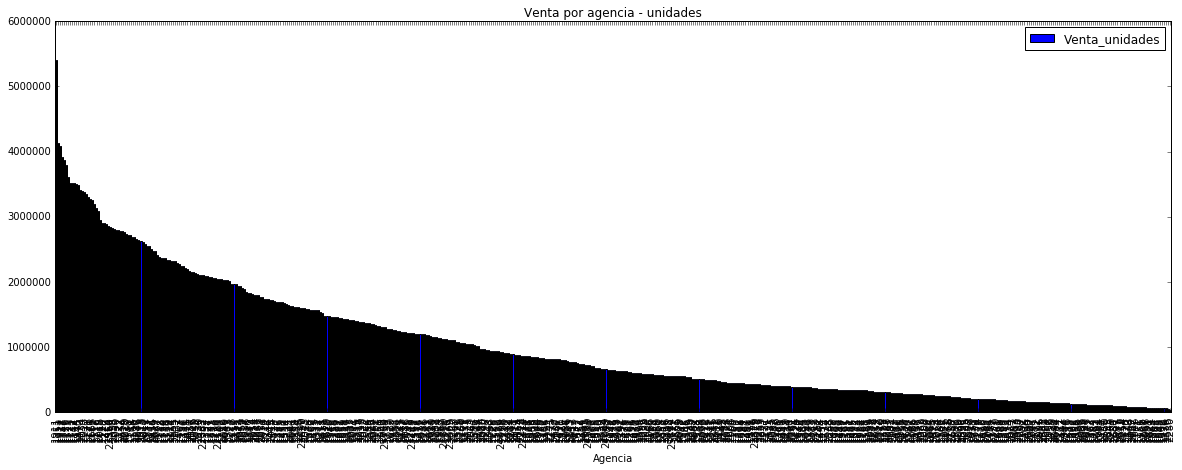

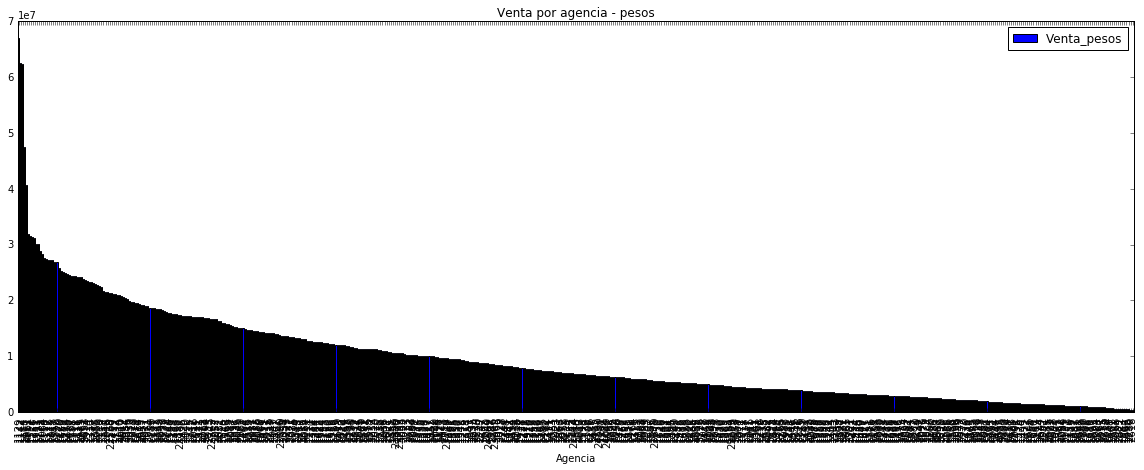

In [81]:
# Plot the sorted pandas data frames

pd_ASG02.plot(x = 'Agencia', y = 'Venta_unidades', kind = 'bar', figsize = [20, 7], title = 'Venta por agencia - unidades')
pd_ASG03.plot(x = 'Agencia', y = 'Venta_pesos', kind = 'bar', figsize = [20, 7], title = 'Venta por agencia - pesos')

In [82]:
# Following the 80/20 rule
# The 20 % of the agencies will generate the 80 % of the sales - units & money

TotalAgency = len(pd_ASG01)
HundredPercentage = 1
TwentyPercentage = 0.2

TopAgencies = int((TwentyPercentage * TotalAgency)/HundredPercentage)

pd_TopAgenciesUnits = pd_ASG02.head(TopAgencies)
pd_TopAgenciesMoney = pd_ASG03.head(TopAgencies)

print("Total agencies: " + str(TotalAgency))
print("20 % top agencies: " + str(TopAgencies))

Total agencies: 552
20 % top agencies: 110


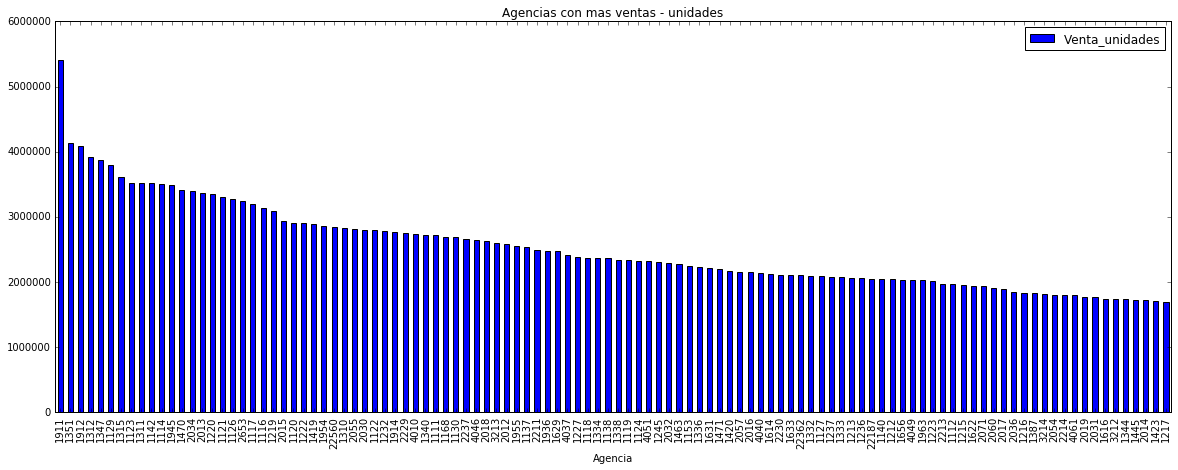

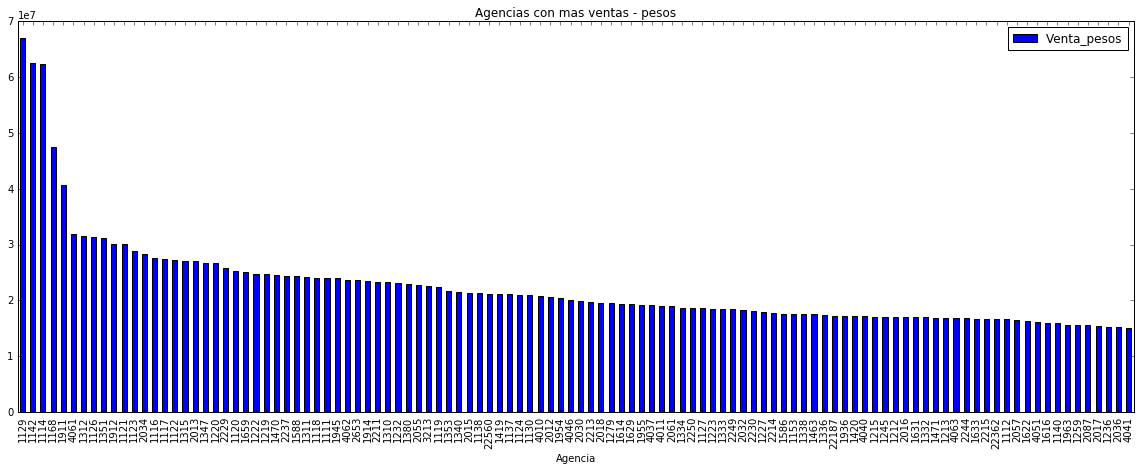

In [83]:
# In the two graphics we can see:
# - Top agencies by sales(units)
# - Top agencies by sales(pesos)

pd_TopAgenciesUnits.plot(x = 'Agencia', y = 'Venta_unidades', kind = 'bar', figsize = [20, 7], title = 'Agencias con mas ventas - unidades')
pd_TopAgenciesMoney.plot(x = 'Agencia', y = 'Venta_pesos', kind = 'bar', figsize = [20, 7], title = 'Agencias con mas ventas - pesos')

In [84]:
df_TopAgenciesUnits = spark.createDataFrame(pd_TopAgenciesUnits)
df_TopAgenciesMoney = spark.createDataFrame(pd_TopAgenciesMoney)

In [85]:
df_TopAgenciesUnits.show()
df_TopAgenciesMoney.show()

+-------+------------------+--------------+--------------------+-------------------+
|Agencia|  Devolucion_pesos|Venta_unidades|         Venta_pesos|Devolucion_unidades|
+-------+------------------+--------------+--------------------+-------------------+
|   1911| 767848.1500000028|       5406257|4.0608436049996726E7|              88171|
|   1351| 362703.4199999984|       4129101|3.1118163389992587E7|              44574|
|   1912|  521733.409999997|       4083357| 3.017813864999344E7|              60833|
|   1312|452619.04999999655|       3915553|3.1521932589993954E7|              48974|
|   1347| 479085.5999999966|       3869720|2.6799492979991995E7|              66306|
|   1129|354812.64999999997|       3799260| 6.703347171999976E7|              19644|
|   1315| 491507.4399999974|       3616071|2.7148996789993234E7|              63707|
|   1123|521254.17999999435|       3521028| 2.880849514998984E7|              53695|
|   1311| 574754.2399999956|       3518781| 2.427496743999353E7| 

In [86]:
# **********************************************************************************************************************************
ParametersUnits = (df_TopAgenciesUnits.Devolucion_unidades/(df_TopAgenciesUnits.Venta_unidades + df_TopAgenciesUnits.Devolucion_unidades))*100
df_TopAgenciesUnits = df_TopAgenciesUnits.withColumn("Porc_Devolucion_unidades", ParametersUnits)

# **********************************************************************************************************************************

ParametersMoney = (df_TopAgenciesMoney.Devolucion_pesos/(df_TopAgenciesMoney.Venta_pesos + df_TopAgenciesMoney.Devolucion_pesos))*100
df_TopAgenciesMoney = df_TopAgenciesMoney.withColumn("Porc_Devolucion_pesos", ParametersMoney)

In [87]:
df_TopAgenciesUnits.show()
df_TopAgenciesMoney.show()

+-------+------------------+--------------+--------------------+-------------------+------------------------+
|Agencia|  Devolucion_pesos|Venta_unidades|         Venta_pesos|Devolucion_unidades|Porc_Devolucion_unidades|
+-------+------------------+--------------+--------------------+-------------------+------------------------+
|   1911| 767848.1500000028|       5406257|4.0608436049996726E7|              88171|       1.604734833180087|
|   1351| 362703.4199999984|       4129101|3.1118163389992587E7|              44574|      1.0679796582148826|
|   1912|  521733.409999997|       4083357| 3.017813864999344E7|              60833|      1.4679104963816814|
|   1312|452619.04999999655|       3915553|3.1521932589993954E7|              48974|      1.2353049935086835|
|   1347| 479085.5999999966|       3869720|2.6799492979991995E7|              66306|      1.6845925306387712|
|   1129|354812.64999999997|       3799260| 6.703347171999976E7|              19644|      0.5143884213900113|
|   1315| 

In [88]:
pd_TopAgenciesUnits = df_TopAgenciesUnits.toPandas()
pd_TopAgenciesMoney = df_TopAgenciesMoney.toPandas()

In [89]:
pd_TopAgenciesUnits.head(3)

,Agencia,Devolucion_pesos,Venta_unidades,Venta_pesos,Devolucion_unidades,Porc_Devolucion_unidades
0,1911,767848.15,5406257,40608436.049997,88171,1.604735
1,1351,362703.42,4129101,31118163.389993,44574,1.067980
2,1912,521733.41,4083357,30178138.649993,60833,1.467910


In [90]:
pd_TopAgenciesMoney.head(3)

,Agencia,Devolucion_pesos,Venta_unidades,Venta_pesos,Devolucion_unidades,Porc_Devolucion_pesos
0,1129,354812.65,3799260,67033471.720000,19644,0.526520
1,1142,571478.53,3515849,62596281.960000,35968,0.904700
2,1114,2480404.71,3498170,62420319.799999,150779,3.821844


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4213fd9d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa4210b79d0>], dtype=object)

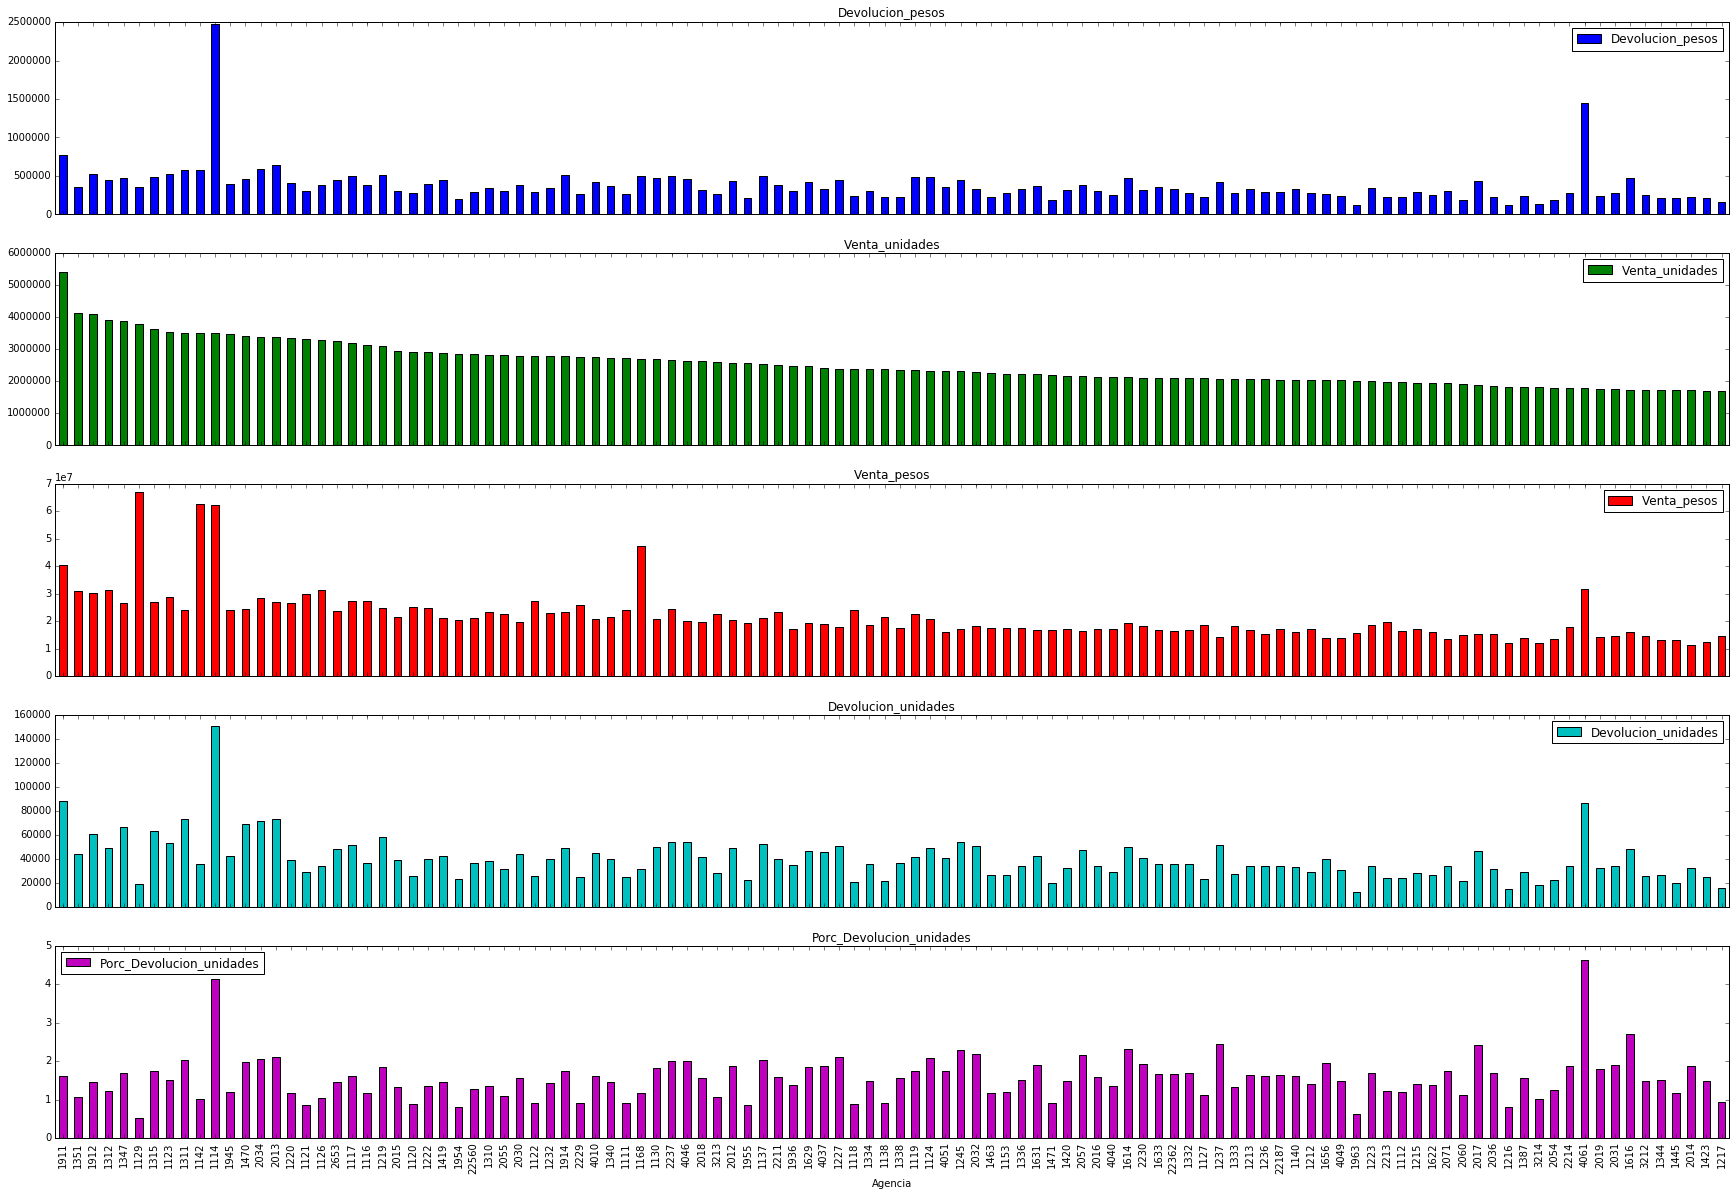

In [91]:
# ********************************************************************************************************
# ********************************************************************************************************
# Top agencies in sales - units
# Plot by agency the sales in units, the sales in pesos, the devolutions in units and the devolutions in %
# ********************************************************************************************************
# ********************************************************************************************************

pd_TopAgenciesUnits.plot.bar(x = 'Agencia', subplots = True, sort_columns=False, figsize = [30, 20])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa420edc710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa423395fd0>], dtype=object)

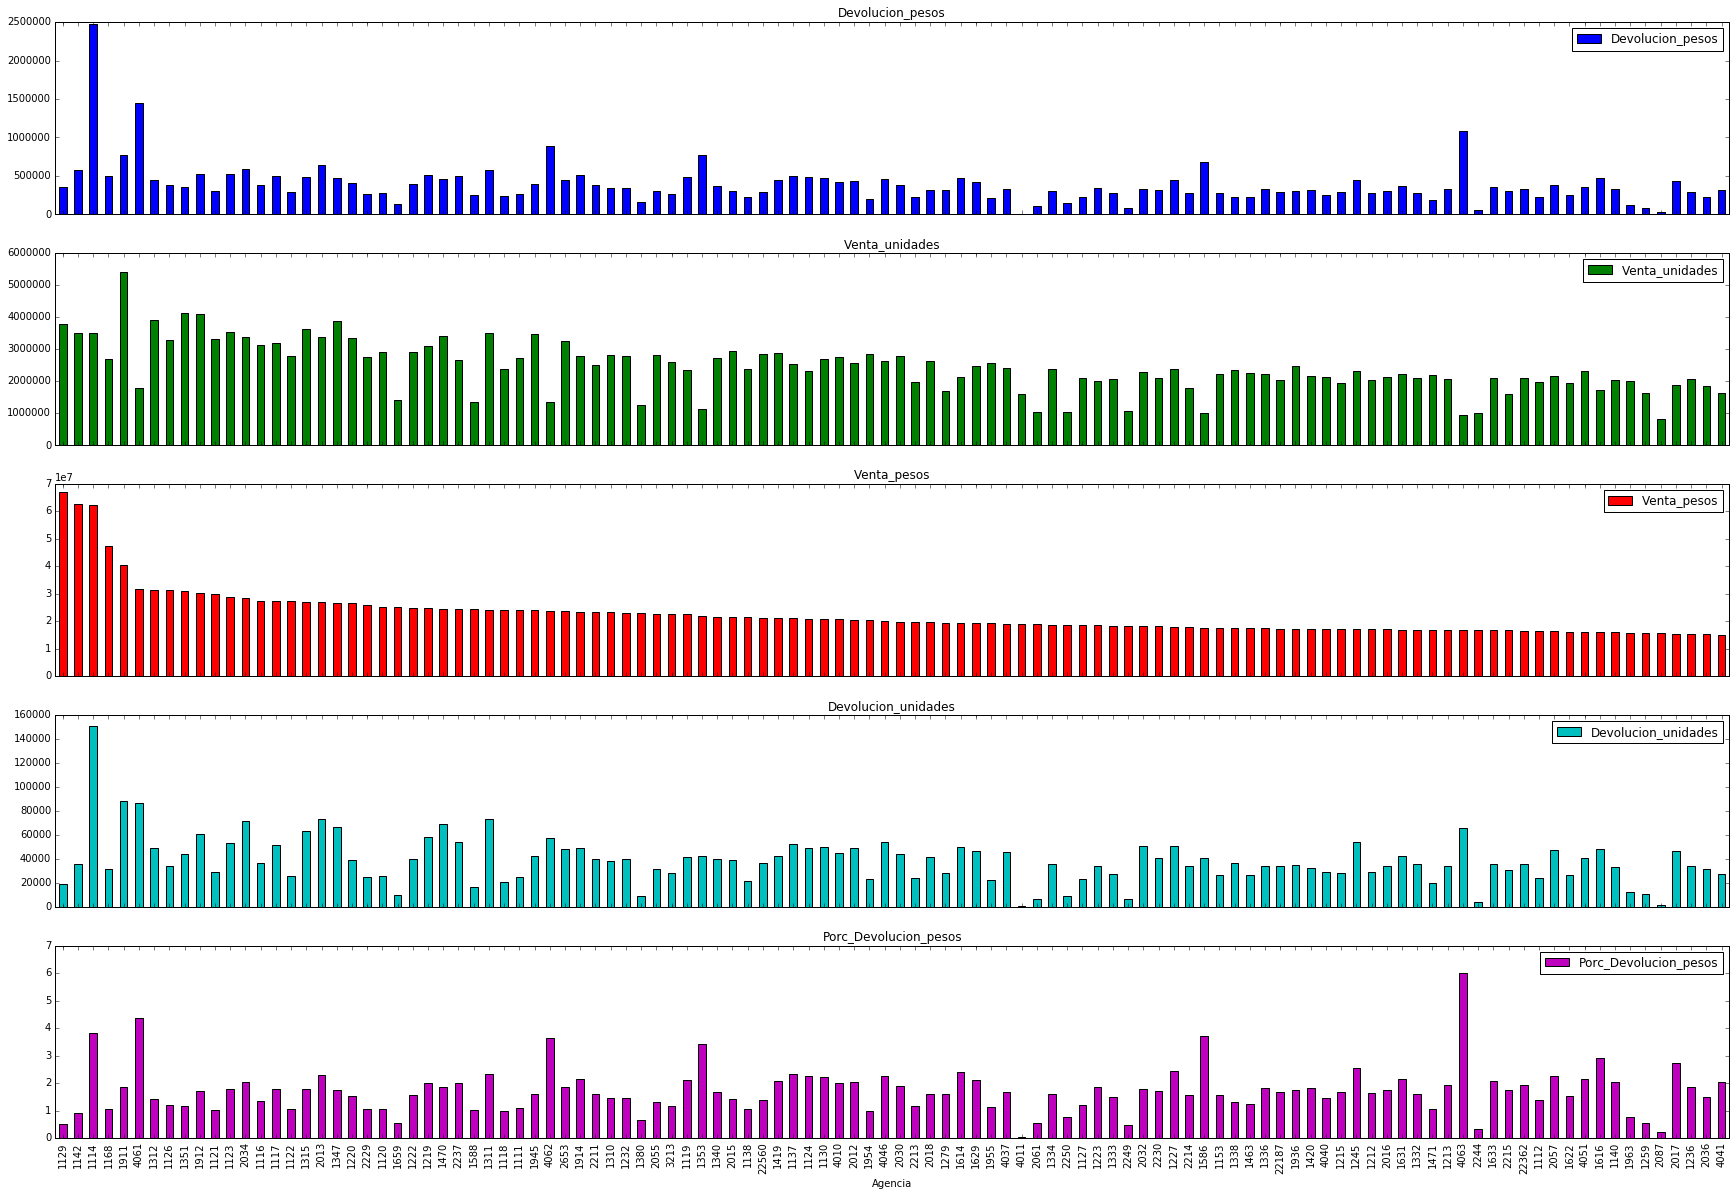

In [92]:
# ********************************************************************************************************
# ********************************************************************************************************
# Top agencies in sales - pesos
# Plot by agency the sales in units, the sales in pesos, the devolutions in units and the devolutions in %
# ********************************************************************************************************
# ********************************************************************************************************

pd_TopAgenciesMoney.plot.bar(x = 'Agencia', subplots = True, sort_columns=False, figsize = [30, 20])

In [93]:
# Set the conditions for the union 

CondLocationUnits = [df_TopAgenciesUnits.Agencia == df_TownSpk.Agencia_ID]
CondLocationMoney = [df_TopAgenciesMoney.Agencia == df_TownSpk.Agencia_ID]

# Do the union with the above conditions

df_TopAgenciesUnits = df_TopAgenciesUnits.join(df_TownSpk, CondLocationUnits).drop(df_TownSpk.Agencia_ID)
df_TopAgenciesMoney = df_TopAgenciesMoney.join(df_TownSpk, CondLocationMoney).drop(df_TownSpk.Agencia_ID)

In [94]:
df_TopAgenciesUnits.show()
df_TopAgenciesMoney.show()

+-------+------------------+--------------+--------------------+-------------------+------------------------+--------------------+----------------+
|Agencia|  Devolucion_pesos|Venta_unidades|         Venta_pesos|Devolucion_unidades|Porc_Devolucion_unidades|                Town|           State|
+-------+------------------+--------------+--------------------+-------------------+------------------------+--------------------+----------------+
|   1911| 767848.1500000028|       5406257|4.0608436049996726E7|              88171|       1.604734833180087|          2309 NORTE|         JALISCO|
|   1351| 362703.4199999984|       4129101|3.1118163389992587E7|              44574|      1.0679796582148826|2252 AGUASCALIENT...|  AGUASCALIENTES|
|   1912|  521733.409999997|       4083357| 3.017813864999344E7|              60833|      1.4679104963816814|    2294 GUADALAJARA|         JALISCO|
|   1312|452619.04999999655|       3915553|3.1521932589993954E7|              48974|      1.2353049935086835|  2

In [95]:
df_TopAgenciesUnitsTown = df_TopAgenciesUnits.groupby(["State"]).agg({"Venta_unidades":"sum", "Devolucion_unidades": "sum", "Agencia":"count"}).collect()
df_TopAgenciesMoneyTown = df_TopAgenciesMoney.groupby(["State"]).agg({"Venta_pesos":"sum", "Devolucion_pesos": "sum", "Agencia":"count"}).collect()

In [96]:
pd_TopAgenciesUnitsTown = pd.DataFrame(df_TopAgenciesUnitsTown)
pd_TopAgenciesMoneyTown = pd.DataFrame(df_TopAgenciesMoneyTown)

In [97]:
print(pd_TopAgenciesUnitsTown.head(3))
print(pd_TopAgenciesMoneyTown.head(3))

            0  1         2       3
0  NUEVO LEÓN  7  16910253  315603
1     TABASCO  3   6576477  105673
2     SINALOA  2   4872152   36404
              0  1           2             3
0  QUINTANA ROO  1   142968.00  1.864527e+07
1    NUEVO LEÓN  8  4198779.21  1.754040e+08
2       SINALOA  3  1010387.14  5.381879e+07


In [98]:
pd_TopAgenciesUnitsTown.columns = ['Estado', 'No Agencias','Venta_unidades', 'Devolucion_unidades']
pd_TopAgenciesUnitsTown = pd_TopAgenciesUnitsTown.sort_values(by = ['Venta_unidades'], ascending = False)

pd_TopAgenciesMoneyTown.columns = ['Estado', 'No Agencias','Devolucion_pesos', 'Venta_pesos']
pd_TopAgenciesMoneyTown = pd_TopAgenciesMoneyTown.sort_values(by = ['Venta_pesos'], ascending = False)

In [99]:
df_TopAgenciesUnitsTown = spark.createDataFrame(pd_TopAgenciesUnitsTown)
df_TopAgenciesMoneyTown = spark.createDataFrame(pd_TopAgenciesMoneyTown)

In [100]:
df_TopAgenciesUnitsTown.show()
df_TopAgenciesMoneyTown.show()

+----------------+-----------+--------------+-------------------+
|          Estado|No Agencias|Venta_unidades|Devolucion_unidades|
+----------------+-----------+--------------+-------------------+
|ESTADO DE MÉXICO|         20|      54213100|             820506|
|    MÉXICO, D.F.|         17|      43179736|             596038|
|         JALISCO|         10|      32804059|             529410|
|      GUANAJUATO|          9|      20255753|             325470|
|      NUEVO LEÓN|          7|      16910253|             315603|
|          PUEBLA|          6|      13582288|             250893|
|       MICHOACÁN|          3|       8720898|             145256|
|        VERACRUZ|          4|       8554063|             151060|
|  AGUASCALIENTES|          2|       7998821|             110880|
|         TABASCO|          3|       6576477|             105673|
|         HIDALGO|          3|       6561260|             105767|
|        GUERRERO|          3|       6108186|             106341|
|       CH

In [101]:
ParametersUnits_ = (df_TopAgenciesUnitsTown.Devolucion_unidades/(df_TopAgenciesUnitsTown.Venta_unidades + df_TopAgenciesUnitsTown.Devolucion_unidades))*100
df_TopAgenciesUnitsTown = df_TopAgenciesUnitsTown.withColumn("Porc_Devolucion_unidades", ParametersUnits_)

ParametersMoney_ = (df_TopAgenciesMoneyTown.Devolucion_pesos/(df_TopAgenciesMoneyTown.Venta_pesos + df_TopAgenciesMoneyTown.Devolucion_pesos))*100
df_TopAgenciesMoneyTown = df_TopAgenciesMoneyTown.withColumn("Porc_Devolutions_pesos", ParametersMoney_)

In [102]:
df_TopAgenciesUnitsTown.show()
df_TopAgenciesMoneyTown.show()

+----------------+-----------+--------------+-------------------+------------------------+
|          Estado|No Agencias|Venta_unidades|Devolucion_unidades|Porc_Devolucion_unidades|
+----------------+-----------+--------------+-------------------+------------------------+
|ESTADO DE MÉXICO|         20|      54213100|             820506|       1.490918112834547|
|    MÉXICO, D.F.|         17|      43179736|             596038|      1.3615704430491622|
|         JALISCO|         10|      32804059|             529410|      1.5882235359302086|
|      GUANAJUATO|          9|      20255753|             325470|       1.581392903618993|
|      NUEVO LEÓN|          7|      16910253|             315603|      1.8321469771952117|
|          PUEBLA|          6|      13582288|             250893|       1.813704309948666|
|       MICHOACÁN|          3|       8720898|             145256|      1.6383202908498995|
|        VERACRUZ|          4|       8554063|             151060|      1.7353000066742306|

In [103]:
pd_TopAgenciesUnitsTown = df_TopAgenciesUnitsTown.toPandas()
pd_TopAgenciesMoneyTown = df_TopAgenciesMoneyTown.toPandas()

In [104]:
pd_TopAgenciesUnitsTown = pd_TopAgenciesUnitsTown.sort_values(by = ['Venta_unidades'], ascending = False)
pd_TopAgenciesMoneyTown = pd_TopAgenciesMoneyTown.sort_values(by = ['Venta_pesos'], ascending = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa42364a690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa4202ed890>], dtype=object)

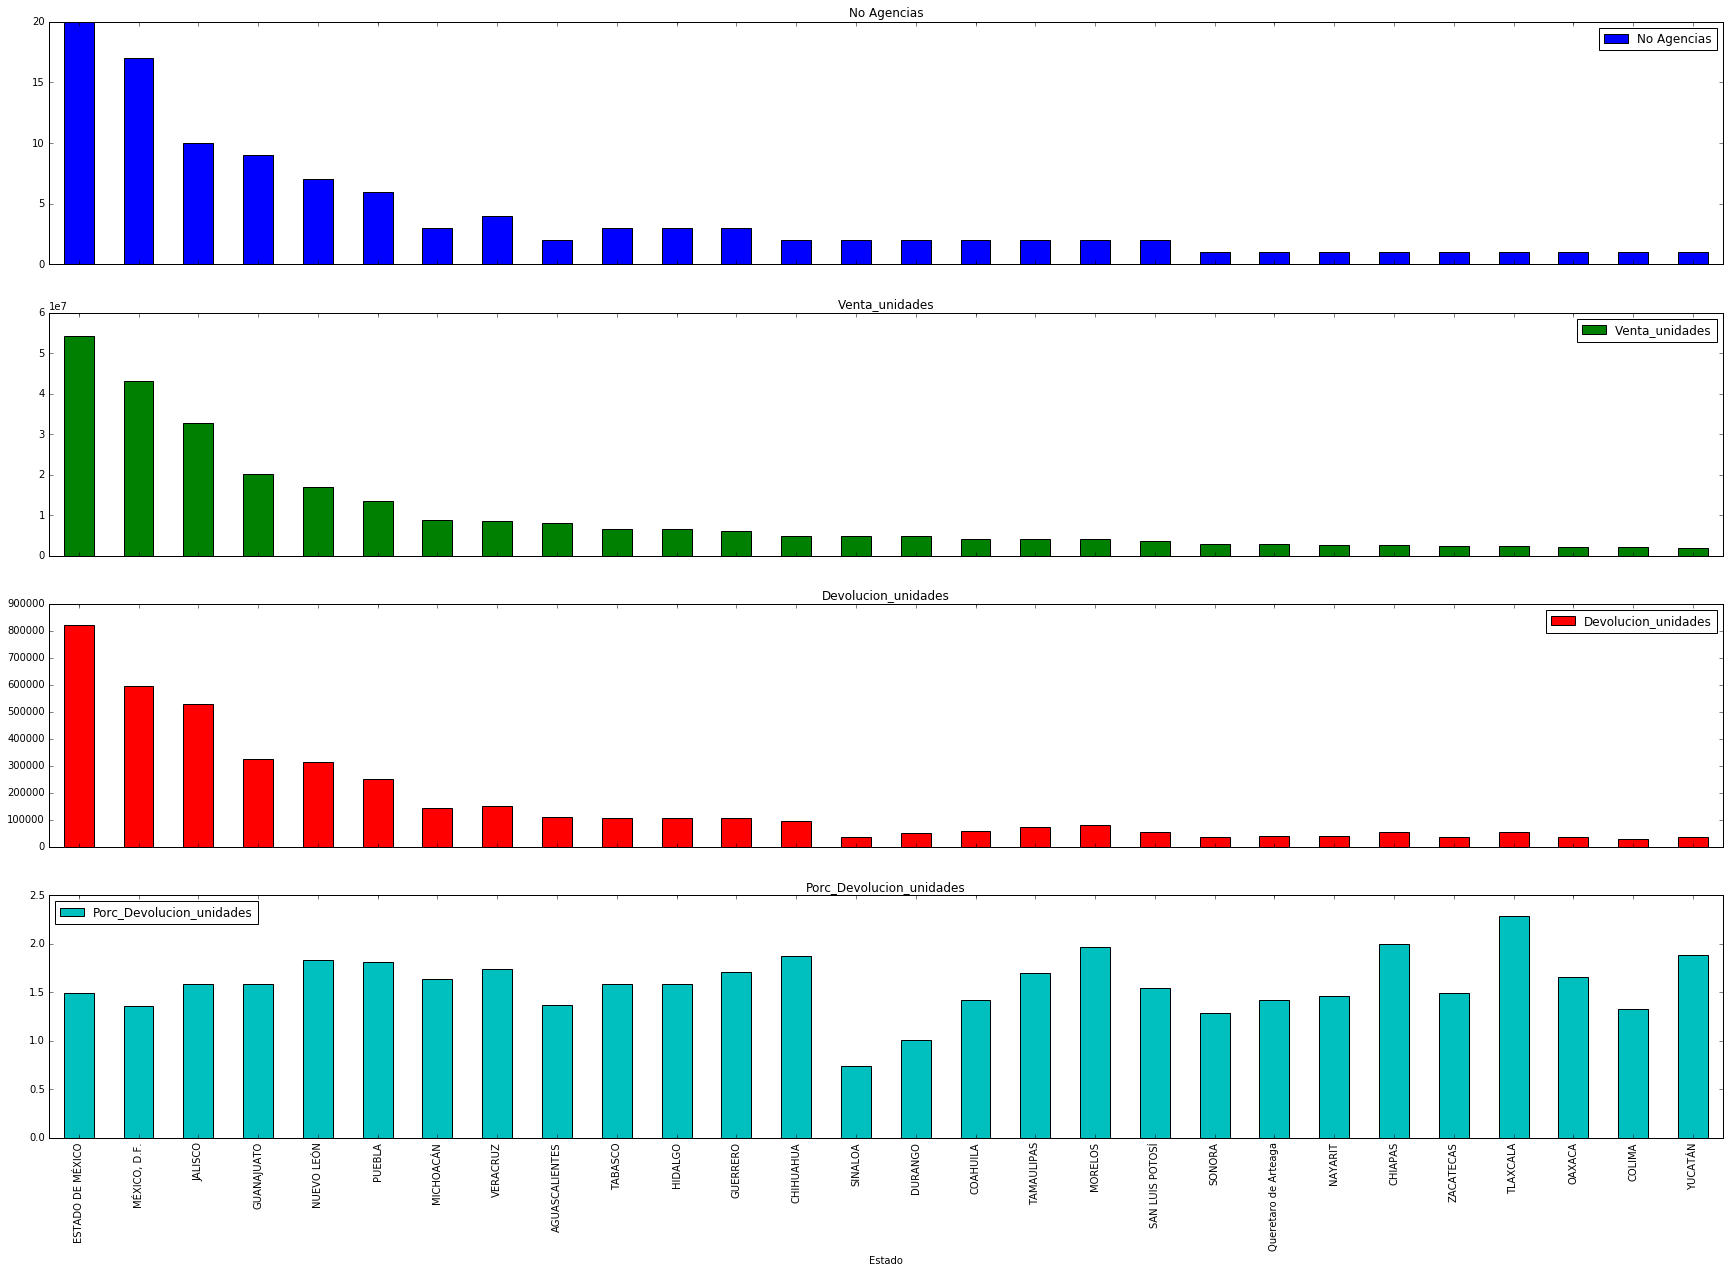

In [105]:
# ********************************************************************************************************
# ********************************************************************************************************
# Plot by state the numer of agencies, the sales in units, the sales in pesos, the devolutions in units 
# and the devolutions in %
# ********************************************************************************************************
# ********************************************************************************************************

pd_TopAgenciesUnitsTown.plot.bar(x = 'Estado', subplots = True, figsize = [30, 20])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa421523210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa41f40dd90>], dtype=object)

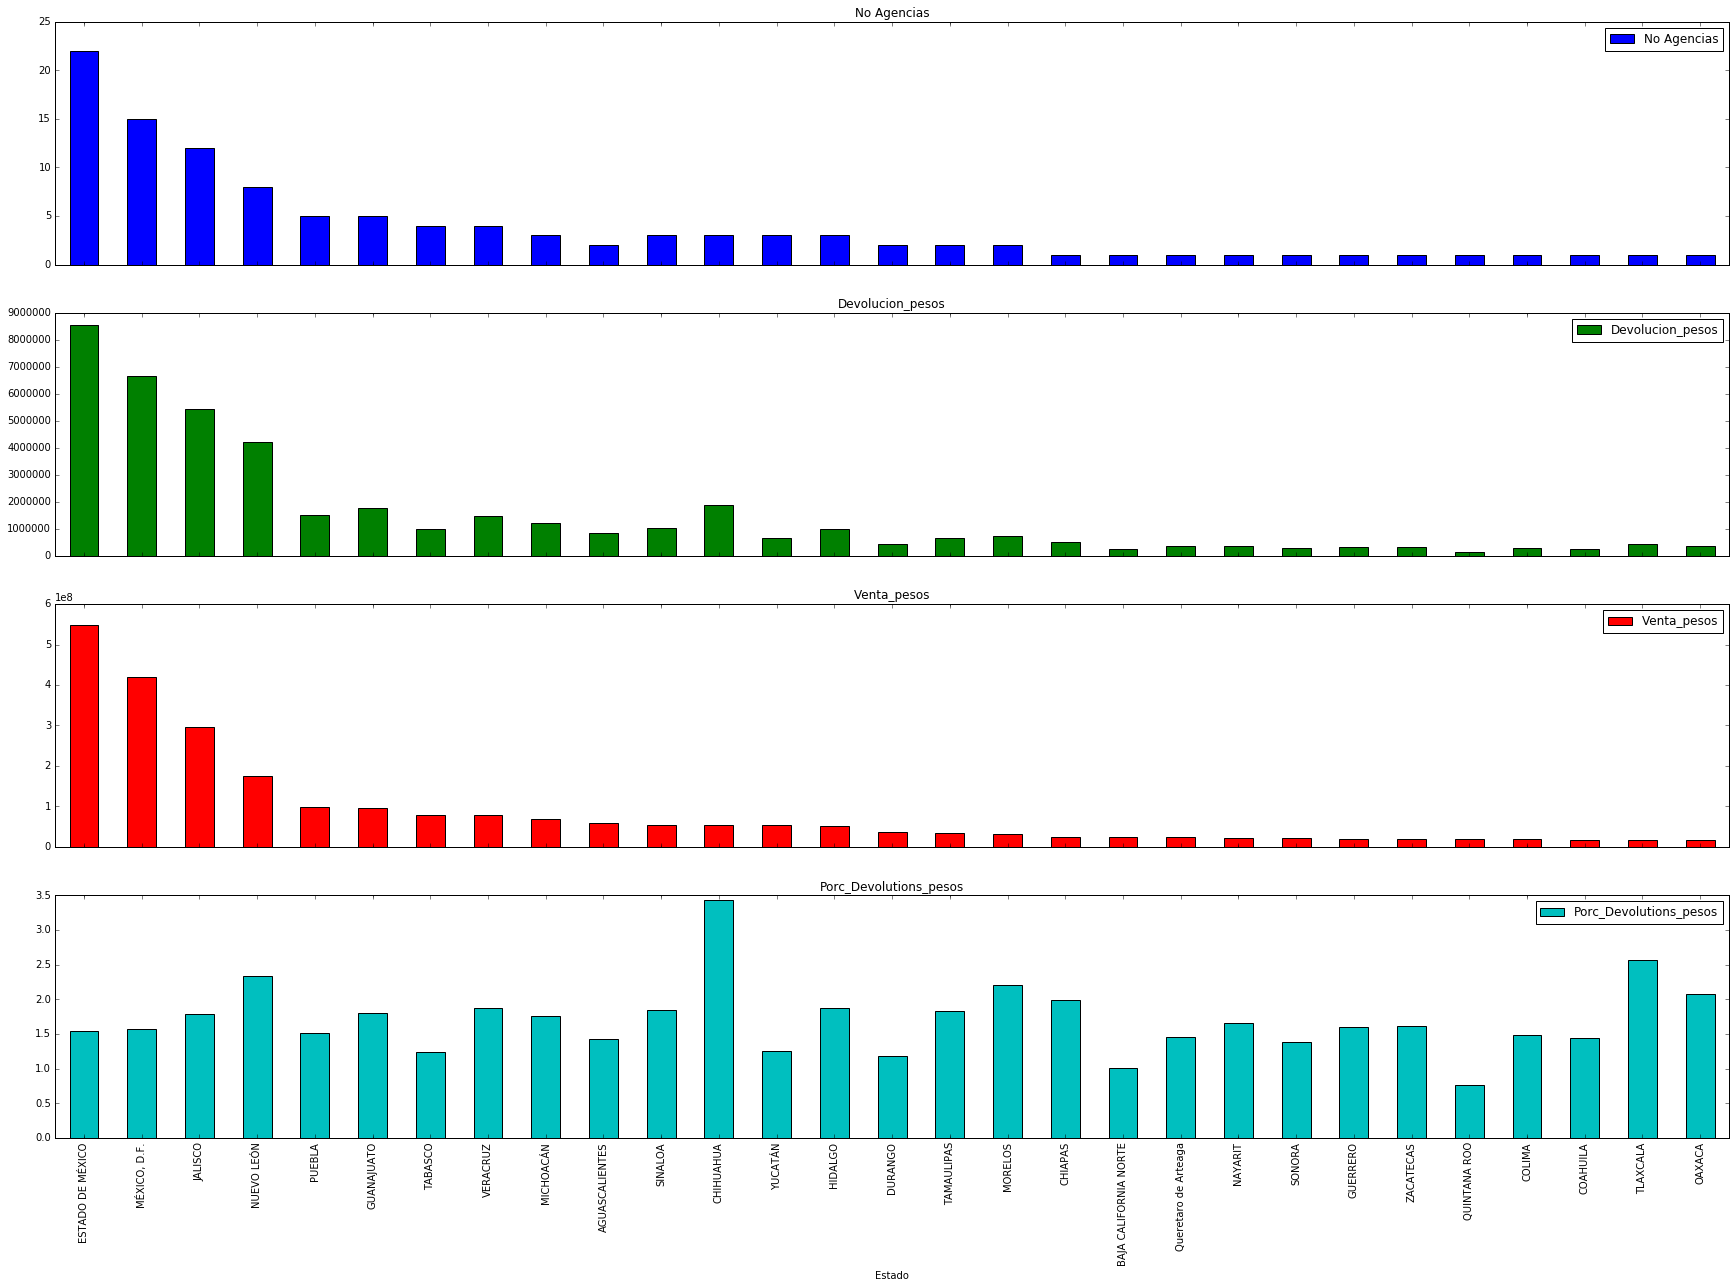

In [106]:
# ********************************************************************************************************
# ********************************************************************************************************
# Plot by state the numer of agencies the sales in units, the sales in pesos, the devolutions in units 
# and the devolutions in %
# ********************************************************************************************************
# ********************************************************************************************************

pd_TopAgenciesMoneyTown.plot.bar(x = 'Estado', subplots = True, figsize = [30, 20])

In [107]:
df_CanalID = df_TrainSpk0

In [108]:
# df_CanalId0: dataframe grouped by Agencia_ID & Canal_ID
# df_CanalId1: dataframe grouped by Canal_ID

df_CanalID0 = df_CanalID.groupby(["Agencia_ID","Canal_ID"]).agg({"Venta_uni_hoy":"sum", "Venta_hoy":"sum","Dev_uni_proxima":"sum", "Dev_proxima":"sum"}).collect()
df_CanalID1 = df_CanalID.groupby(["Canal_ID"]).agg({"Venta_uni_hoy":"sum", "Venta_hoy":"sum", "Dev_uni_proxima":"sum", "Dev_proxima":"sum"}).collect()

In [109]:
df_CanalID0 = spark.createDataFrame(df_CanalID0)
df_CanalID1 = spark.createDataFrame(df_CanalID1)

In [110]:
pd_CanalID1 = df_CanalID1.toPandas()

In [111]:
pd_CanalID1 = pd_CanalID1.sort_values(by = ['sum(Venta_hoy)'], ascending = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa41f154a90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa41ec4e910>], dtype=object)

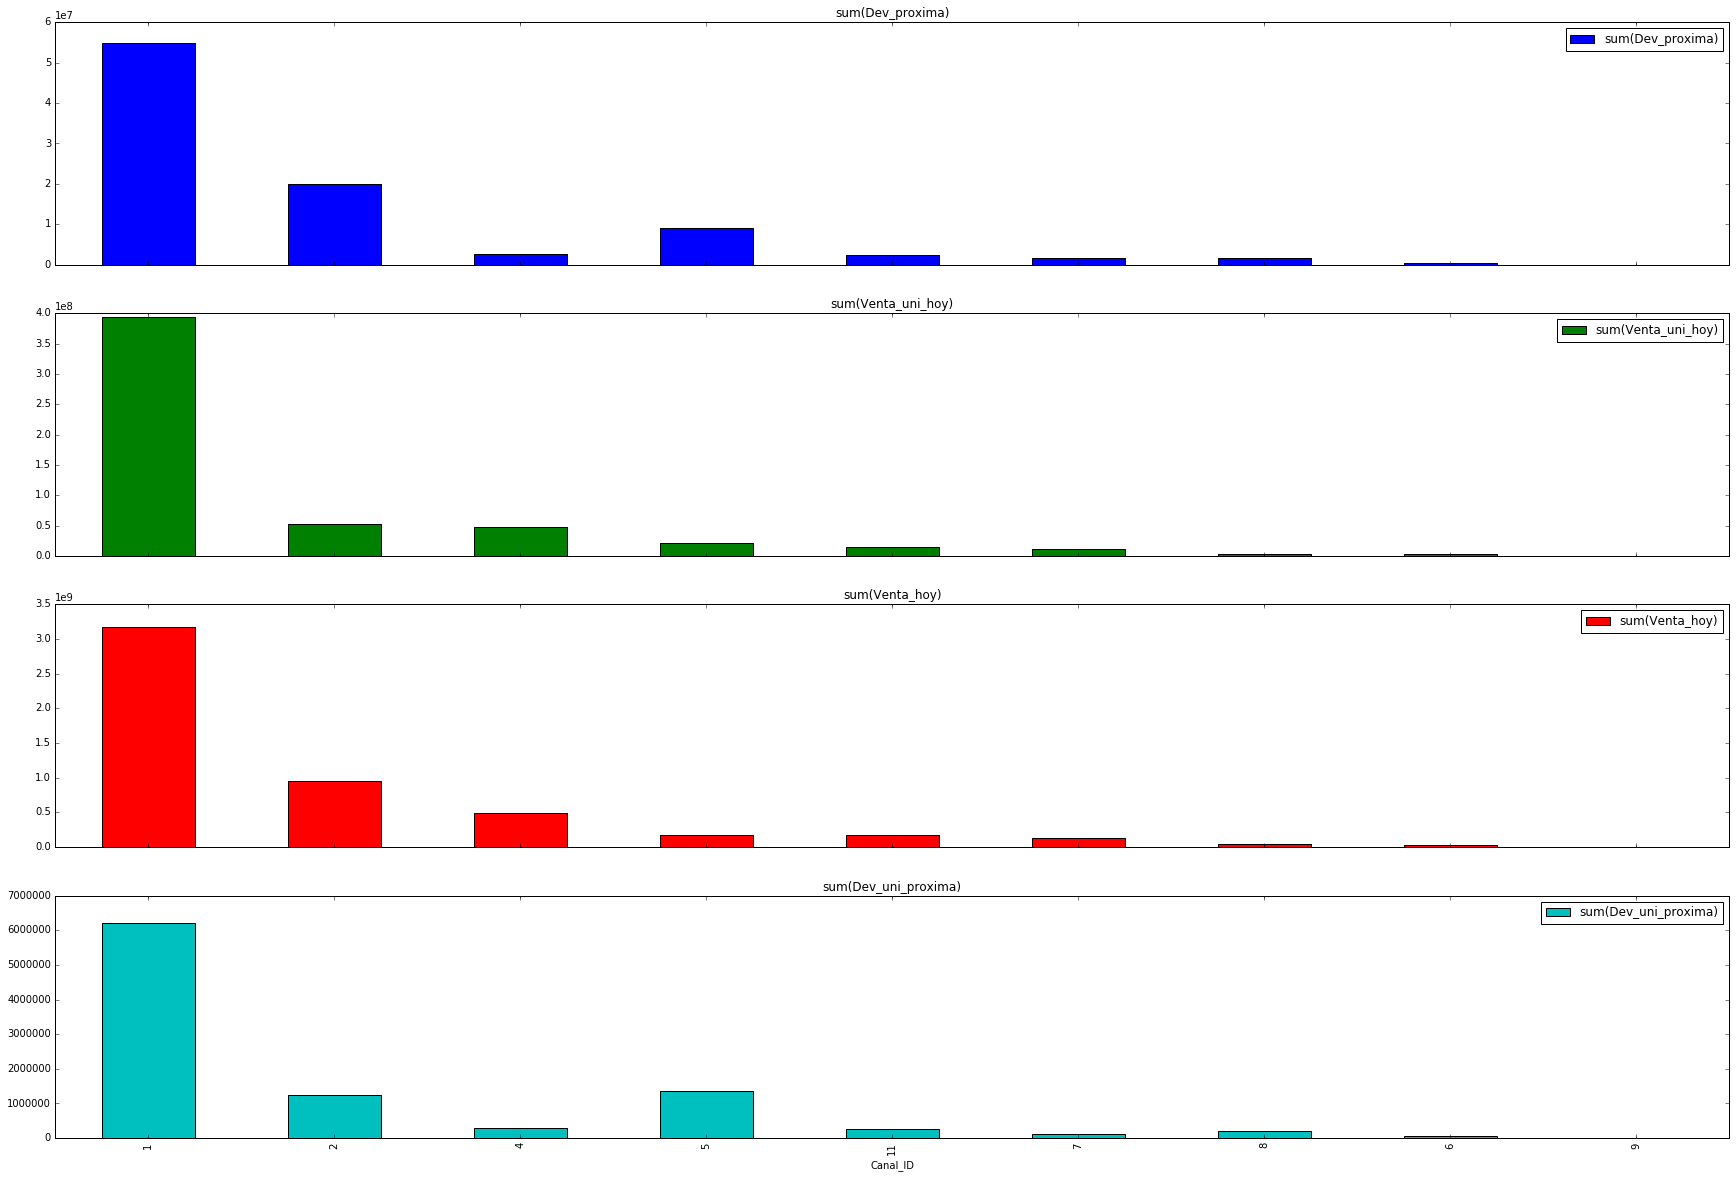

In [112]:
# Plot:
# - Devolutions by channel (units & pesos)
# - Sales by channel (units & pesos)
# the most important channel is the 1 & second the place is for the 2

pd_CanalID1.plot.bar(x = 'Canal_ID', subplots = True, figsize = [30, 20])

In [113]:
# df_CanalID2: data frame 2 canal Id 
# We're selecting the two most important channels according to sales in pesos

CondChannels = df_CanalID0.Canal_ID <= 2

df_CanalID2 = df_CanalID0.where(CondChannels).collect()

In [114]:
df_CanalID2 = spark.createDataFrame(df_CanalID2)

In [115]:
TopAgenciesbyMoney = df_TopAgenciesMoney.select(["Agencia"])
TopAgenciesbyUnits = df_TopAgenciesMoney.select(["Agencia"])

In [116]:
# Conditions for the join
# 00 Top agencies in relation with the sales in mxn (pesos)
# 01 Top agencies in relation with the sales in units

TopAgenciesCanalId_Cond00 = [df_CanalID2.Agencia_ID == TopAgenciesbyMoney.Agencia]
TopAgenciesCanalId_Cond01 = [df_CanalID2.Agencia_ID == TopAgenciesbyUnits.Agencia]

# Execute the join with the above conditions
# df_CanalID3 --> top agencies by money
# df_CanalID4 --> top agencies by units

df_CanalID3 = df_CanalID2.join(TopAgenciesbyMoney, TopAgenciesCanalId_Cond00).drop(TopAgenciesbyMoney.Agencia)
df_CanalID4 = df_CanalID2.join(TopAgenciesbyUnits, TopAgenciesCanalId_Cond01).drop(TopAgenciesbyUnits.Agencia)

In [117]:
# Conditions for the join
# 00 Top agencies in relation with the sales in mxn (pesos)
# 01 Top agencies in relation with the sales in units

TopAgenciesCanalId_Cond00 = [df_CanalID2.Agencia_ID == TopAgenciesbyMoney.Agencia]
TopAgenciesCanalId_Cond01 = [df_CanalID2.Agencia_ID == TopAgenciesbyUnits.Agencia]

# Execute the join with the above conditions
# df_CanalID3 --> top agencies by money
# df_CanalID4 --> top agencies by units

df_CanalID3 = df_CanalID2.join(TopAgenciesbyMoney, TopAgenciesCanalId_Cond00).drop(TopAgenciesbyMoney.Agencia)
df_CanalID4 = df_CanalID2.join(TopAgenciesbyUnits, TopAgenciesCanalId_Cond01).drop(TopAgenciesbyUnits.Agencia)

In [118]:
# Create the pandas dataframe in order to plot them

pd_CanalID3 = df_CanalID3.toPandas()
pd_CanalID4 = df_CanalID4.toPandas()

In [119]:
# df_CanalID3 --> top agencies by money with channels 1 or 2

pd_CanalID3 = pd_CanalID3.sort_values(by = ['Agencia_ID'], ascending = False)

In [120]:
# df_CanalID4 --> top agencies by units with channels 1 or 2
# At this point we know the top agencies with channel 1 or 2 and the toal sales(unit & money) by channel

pd_CanalID4 = pd_CanalID4.sort_values(by = ['Agencia_ID'], ascending = False)

In [121]:
# By we'll continue with the product analysis in order to know the top products 
# Later we'll come back to our top agencies in order to know the top products in the top agencies 
# and check if the top products match with the products of the top agencies

In [122]:
# The first step si to preprocess the df products in order to know the brand, short name and pieces
# Is easier do it with pandas than Spark

pd_ProductSpk = df_ProductSpk.toPandas()

In [123]:
pd_ProductSpk['ShortName'] = pd_ProductSpk.NombreProducto.str.extract('^(\D*)').astype('string')
pd_ProductSpk['Brand'] = pd_ProductSpk.NombreProducto.str.extract('^.+\s(\D+) \d+$').astype('string')
pd_ProductSpk['Pieces'] =  pd_ProductSpk.NombreProducto.str.extract('(\d+)p ').astype('float')

In [124]:
pd_ProductSpk.head()

,Producto_ID,NombreProducto,ShortName,Brand,Pieces
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,6
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,4


In [125]:
# df_Products: souce dataframe for products

df_Products = spark.createDataFrame(pd_ProductSpk)

In [126]:
df_Products1 = df_Products.groupby(["ShortName"]).count().collect()

In [127]:
df_Products1 = spark.createDataFrame(df_Products1)

In [128]:
df_Products1.show()

+--------------------+-----+
|           ShortName|count|
+--------------------+-----+
|        Rollo Fresa |    4|
|Lata Cuadrada ILo...|    1|
|Granel Beso de Nuez |    1|
| Mi Submarino Fresa |    1|
|          Bimbollos |   11|
|        Tostado Int |    5|
|    Tortilla Hna RW |    2|
|         Mini Rocko |    5|
|  Twinkies Vainilla |    4|
|Pan con Fibra Fre...|    2|
|Lata Corazon Colo...|    1|
|Barra Multigrano ...|   11|
|              Frute |    1|
|         Duo Marias |    4|
|Suavicremas Vaini...|    1|
|   Pan Tost Silueta |    1|
|Tostada Ondulada ...|    5|
|    Pan Multicereal |    2|
|Pan Blanco Bimbo ...|    3|
|Suavicremas Fresa...|    2|
+--------------------+-----+
only showing top 20 rows

